In [1]:
# Import dependencies
import requests
import json
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import pearsonr 
from scipy.stats import linregress

In [60]:
# Define lat and long min/max. -180 = 180 W, 180 = 180 E
lat_range = (-90.000, 90.000)
lng_range = (-180.000, 180.000)

# Create list of random latitude, longitude pairs
lat_values = np.random.uniform(lat_range[0], lat_range[1], 1500)
lng_values = np.random.uniform(lng_range[0], lng_range[1], 1500)
lat_lng = list(zip(lat_values, lng_values))

In [61]:
# Create empty list of cities
cities = []

# Use citipy API to get nearest city to random coordinates, append to cities list
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        


In [62]:
# Make sure the list of cities is greater than 500
len(cities)

599

In [64]:
# Use openweather API call for single city to determine how to access needed information
city = 'london'
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial'
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1603652129,
    "id": 2643743,
    "main": {
        "feels_like": 42.06,
        "humidity": 76,
        "pressure": 996,
        "temp": 49.08,
        "temp_max": 51.8,
        "temp_min": 48
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1603608130,
        "sunset": 1603644401,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 9.17
    }
}


In [69]:
# Create and open datalog to hold search process output, APIdata to hold data needed data from API call

datalog = open('weatherAPI_printlog.txt', 'w', encoding="utf-8")
APIdata = open('weatherAPI_data.csv', 'w', encoding="utf-8")

# Add column names as header in csv
APIdata.write("City,City_ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed\n")

83

In [70]:
# Assign base url and create empty lists for all data I want to collect

base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial'

city_name = []
city_id = []
country = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Do API call within for loop to get data for each city in cities list, assign desired info to variables then append to the 
# appropriate empty list

for city in cities:
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial'
    response = requests.get(base_url).json()
    try:
        city_name1 = response['name']
        city_id1 = int(response['id'])
        country1 = response['sys']['country']
        lat1 = response['coord']['lat']
        lng1 = response['coord']['lon']
        temp1 = response['main']['temp']
        humidity1 = response['main']['humidity']
        cloudiness1 = response['clouds']['all']
        wind_speed1 = response['wind']['speed']
        
        city_name.append(city_name1)
        city_id.append(city_id1)
        country.append(country1)
        lat.append(lat1)
        lng.append(lng1)
        temp.append(temp1)
        humidity.append(humidity1)
        cloudiness.append(cloudiness1)
        wind_speed.append(wind_speed1)
        
# Write API process to datalog and results to APIdata csv
        
        datalog.write(f"{city_name1} with City ID {city_id1} was found\n")
        
        APIdata.write(f"{city_name1}, {city_id1}, {country1}, {lat1}, {lng1}, {temp1}, {humidity1}, {cloudiness1}, {wind_speed1}\n")

# Use exception to handle missing data
        
    except:
        datalog.write(f"{city} was not found\n")
        
        city_name.append(None)
        city_id.append(None)
        country.append(None)
        lat.append(None)
        lng.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)

# Close datalog and APIdata files        
        
datalog.close()
APIdata.close()
                      

In [2]:
# Read in csv from API call

weather_pd = pd.read_csv("weatherAPI_data.csv")
weather_pd

,City,City_ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Oyama,1853483,JP,36.30,139.80,56.12,71,20,1.12
1,Ushuaia,3833367,AR,-54.80,-68.30,51.80,50,40,4.70
2,Veldhoven,2745706,NL,51.42,5.40,51.24,87,90,8.05
3,Hilo,5855927,US,19.73,-155.09,77.99,69,40,4.70
4,Mataura,6201424,NZ,-46.19,168.86,46.00,96,100,1.01
...,...,...,...,...,...,...,...,...,...
553,Oriximiná,3393471,BR,-1.77,-55.87,96.71,36,25,2.84
554,Praia,3374333,CV,14.92,-23.51,84.20,54,0,23.04
555,Jesús Carranza,3526538,MX,17.43,-95.03,84.85,71,69,7.18
556,Thio,2138103,NC,-21.62,166.22,64.40,88,0,1.12


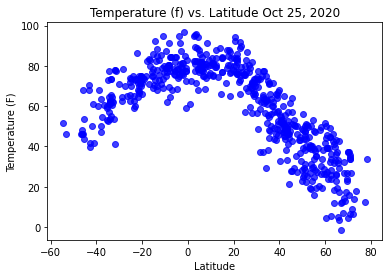

In [3]:
# Create scatter plot use matplotlib

plt.scatter(weather_pd['Latitude'], weather_pd['Temperature'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (f) vs. Latitude Oct 25, 2020')
plt.savefig('../Images/temp_lat.png')
plt.show()

This plot compares each city's temperature on Oct 25 compared to the city's latitude. The plot shows that the temperature increases the closer a city is to the equator (latitude 0) and decreases the further the city is from the equator. It also shows that the dataset includes alot more northern hemisphere cities than southern hemisphere cities. This makes sense because the northern hemisphere has a lot more land than the southern hemisphere and therefore more cities.

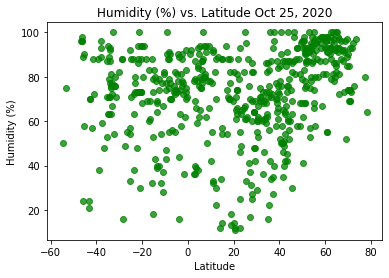

In [4]:
# Create scatter plot use matplotlib

plt.scatter(weather_pd['Latitude'], weather_pd['Humidity'], marker='o', facecolors='green', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude Oct 25, 2020')
plt.savefig('../Images/humidity_lat.png')
plt.show()

This plot shows city's humidity on Oct 25th compared to its latitude. A visual inspection of this plot shows a possible slight correlation between more northern latitudes and more humidity but without a linear regression it's hard to tell.

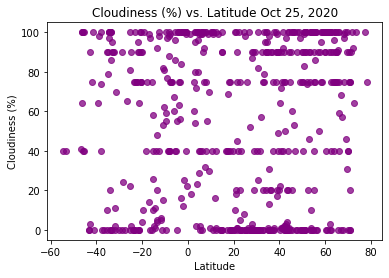

In [5]:
# Create scatter plot use matplotlib

plt.scatter(weather_pd['Latitude'], weather_pd['Cloudiness'], marker='o', facecolors='purple', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude Oct 25, 2020')
plt.savefig('../Images/cloudiness_lat.png')
plt.show()

This plot compares each city's cloudiness on Oct 25th with its latitude. There does not appear to be any correlation between cloudiness and latitude.

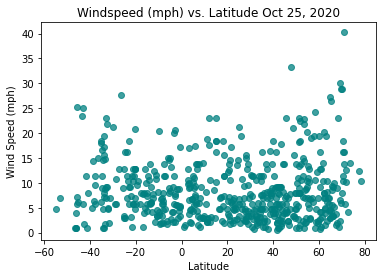

In [6]:
# Create scatter plot use matplotlib

plt.scatter(weather_pd['Latitude'], weather_pd['Wind_Speed'], marker='o', facecolors='teal', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Windspeed (mph) vs. Latitude Oct 25, 2020')
plt.savefig('../Images/wind_speed_lat.png')
plt.show()

This plot shows each city's wind speed on Oct 25th compared to its latitude. A visual inspection of this plot shows a possible slight correlation between more northern latitudes and higher wind speeds but without to a linear regression it's hard to tell.

In [7]:
# Create two new dataframes seperating northern and southern hemispher cities using loc to find cities based on latitude

north_hem = weather_pd.loc[weather_pd['Latitude'] >= 0]
north_hem.head()
south_hem = weather_pd.loc[weather_pd['Latitude'] < 0]
south_hem.head()

,City,City_ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
1,Ushuaia,3833367,AR,-54.80,-68.30,51.80,50,40,4.70
4,Mataura,6201424,NZ,-46.19,168.86,46.00,96,100,1.01
5,Trelew,3833883,AR,-43.25,-65.31,70.75,21,0,24.99
6,Carnarvon,2074865,AU,-24.87,113.63,69.80,88,90,16.11
10,Tuatapere,2180815,NZ,-46.13,167.68,46.00,96,64,1.01


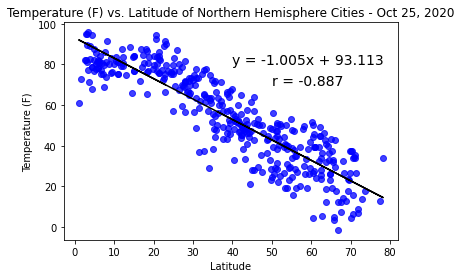

In [8]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(north_hem['Latitude'], north_hem['Temperature'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude of Northern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/north_hem-temp_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Latitude'], north_hem['Temperature'])
predicted_values = north_hem['Latitude'] * slope + intercept
plt.plot(north_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (40, 80), color='black', fontsize=14)
r_value = sts.pearsonr(north_hem['Latitude'], north_hem['Temperature'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (50,70), color='black', fontsize=14)
plt.show()

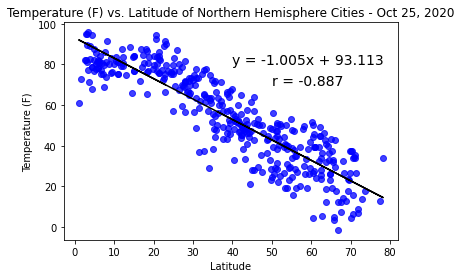

In [9]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(north_hem['Latitude'], north_hem['Temperature'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature (F) vs. Latitude of Northern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/north_hem-temp_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Latitude'], north_hem['Temperature'])
predicted_values = north_hem['Latitude'] * slope + intercept
plt.plot(north_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (40, 80), color='black', fontsize=14)
r_value = sts.pearsonr(north_hem['Latitude'], north_hem['Temperature'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (50,70), color='black', fontsize=14)
plt.show()

These plots show a strong correlation between temperature and latitude. This makes sense as you typically see warmer temperatures closer to the equator. It is interesting that the correlation is stronger for the northern hemisphere (-0.887 vs -0.757) this is likely explained by the greater number of northern hemisphere cities in the dataset. Thinking geographically, there are very few inhabitated far southern latitude areas therefore the southern latitude cities will be more skewed to lower (closer to 0) latitudes then the northern latitude cities.

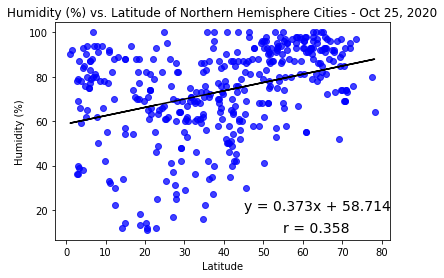

In [10]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(north_hem['Latitude'], north_hem['Humidity'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude of Northern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/north_hem-humidity_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Latitude'], north_hem['Humidity'])
predicted_values = north_hem['Latitude'] * slope + intercept
plt.plot(north_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (45, 20), color='black', fontsize=14)
r_value = sts.pearsonr(north_hem['Latitude'], north_hem['Humidity'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (55,10), color='black', fontsize=14)
plt.show()

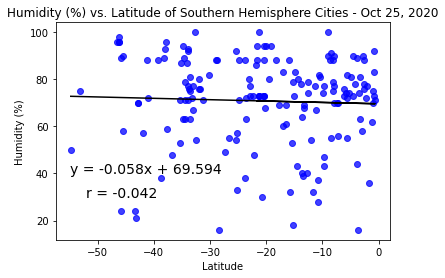

In [11]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(south_hem['Latitude'], south_hem['Humidity'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude of Southern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/south_hem-humidity_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Latitude'], south_hem['Humidity'])
predicted_values = south_hem['Latitude'] * slope + intercept
plt.plot(south_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (-55, 40), color='black', fontsize=14)
r_value = sts.pearsonr(south_hem['Latitude'], south_hem['Humidity'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (-52,30), color='black', fontsize=14)
plt.show()

The relationship between humidity and latitude is very interesting when you look at the hemispheres seperately. The correlation between humidity and latitude for cities in the southern hemisphere is very weak indicating it is unlikely they are correlated. In the northern hemisphere however the correlation is on the upper end of weak, almost in the moderate correlation category (moderate correlation = r between 0.40 and 0.59). It would be interesting to look into possible reasons for this.

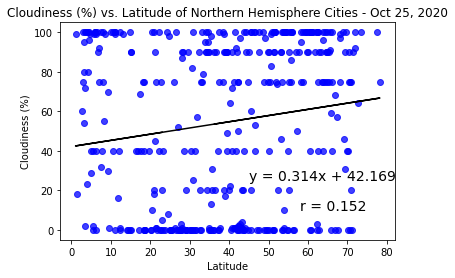

In [12]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(north_hem['Latitude'], north_hem['Cloudiness'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude of Northern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/north_hem-cloudiness_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Latitude'], north_hem['Cloudiness'])
predicted_values = north_hem['Latitude'] * slope + intercept
plt.plot(north_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (45, 25), color='black', fontsize=14)
r_value = sts.pearsonr(north_hem['Latitude'], north_hem['Cloudiness'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (58,10), color='black', fontsize=14)
plt.show()

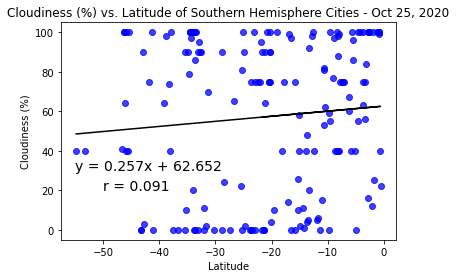

In [13]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(south_hem['Latitude'], south_hem['Cloudiness'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs. Latitude of Southern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/south_hem-cloudiness_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Latitude'], south_hem['Cloudiness'])
predicted_values = south_hem['Latitude'] * slope + intercept
plt.plot(south_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (-55, 30), color='black', fontsize=14)
r_value = sts.pearsonr(south_hem['Latitude'], south_hem['Cloudiness'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (-50,20), color='black', fontsize=14)
plt.show()

There appears to be no correlation between cloudiness and latitude in either hemisphere. The r values for both hemisphere is very weak.

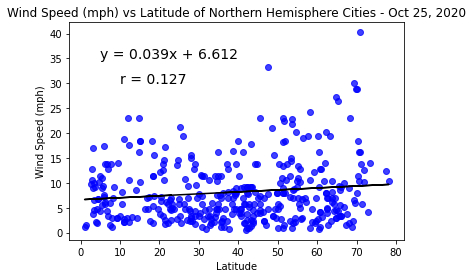

In [14]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(north_hem['Latitude'], north_hem['Wind_Speed'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude of Northern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/north_hem-wind_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Latitude'], north_hem['Wind_Speed'])
predicted_values = north_hem['Latitude'] * slope + intercept
plt.plot(north_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (5, 35), color='black', fontsize=14)
r_value = sts.pearsonr(north_hem['Latitude'], north_hem['Wind_Speed'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (10,30), color='black', fontsize=14)
plt.show()

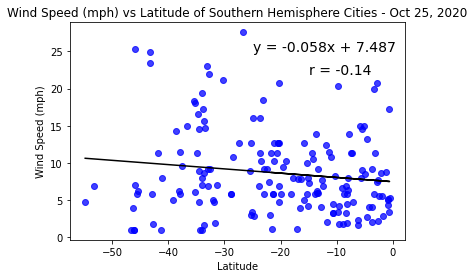

In [15]:
# Use matplotlib to make a scatter plot, calculate the linear regression formula and Pearson r value then add them to the plot

plt.scatter(south_hem['Latitude'], south_hem['Wind_Speed'], marker='o', facecolors='blue', alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latitude of Southern Hemisphere Cities - Oct 25, 2020')
plt.savefig('../Images/south_hem-wind_lat.png')
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Latitude'], south_hem['Wind_Speed'])
predicted_values = south_hem['Latitude'] * slope + intercept
plt.plot(south_hem['Latitude'], predicted_values, color='black')
line_eq = f'y = {round(slope, 3)}x + {round(intercept, 3)}'
plt.annotate(line_eq, (-25, 25), color='black', fontsize=14)
r_value = sts.pearsonr(south_hem['Latitude'], south_hem['Wind_Speed'])
r = f'r = {round(r_value[0], 3)}'
plt.annotate(r, (-15,22), color='black', fontsize=14)
plt.show()

The r values for both hemispheres are very weak when comparing wind speed to latitude. The correlations are appropriately neg/pos based on hemisphere and very similar (0.127 and -0.14). It is possible that with significantly more data points a stronger correlation would be seen.